# Prediction of car prices based on their condition


![image](https://storage.googleapis.com/kaggle-datasets-images/1479517/2444963/1aaa3760e7dd34a87af175482c1514ae/dataset-cover.jpg?t=2021-07-21-09-56-46)

Data extracted from a GitHub repo. Click [here](https://github.com/Data-Market/vehiculos-de-segunda-mano) to see it.

## First view at the data <a id='section1'></a>

In [1]:
import os
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    print('Running on Kaggle')
    data_dir = '../input/car-prices-dataset'
else:
    print('Not running on Kaggle')
    data_dir = 'archive'

Not running on Kaggle


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


original_df = pd.read_csv(f'{data_dir}/coches-de-segunda-mano-sample.csv')
original_df.drop(['url', 'company', 'price_financed', 'dealer', 'color',
                  'publish_date', 'insert_date', 'photos', 'power', 'country'], axis=1, inplace=True) # Drop some useless columns
original_df.drop(['province'], inplace=True, axis=1) # We might use it in the future
original_df.rename({'make': 'manufacturer'}, inplace=True, axis=1)

df_train, df_test = train_test_split(original_df, test_size=0.1, random_state=42)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)


print(f'Shape: {df_train.shape}')
df_train.head()

Shape: (45000, 10)


,manufacturer,model,version,price,fuel,year,kms,doors,shift,is_professional
0,VOLKSWAGEN,up!,VOLKSWAGEN up Move up 1.0 75CV 5p.,3995,Gasolina,2014.0,139000,5,Manual,True
1,SEAT,Ateca,SEAT Ateca 1.5 TSI 110kW 150CV SS FR Go 5p.,27829,Gasolina,2021.0,1,5,Manual,True
2,CITROEN,C4 Spacetourer,CITROEN C4 Spacetourer BlueHDi 88KW 120CV Feel...,17975,Diésel,2018.0,4280,5,Manual,True
3,OPEL,Astra,OPEL Astra 1.7 CDTi 110 CV Selective ST 5p.,6750,Diésel,2013.0,179000,5,Manual,True
4,MAZDA,CX-7,MAZDA,7500,Gasolina,2007.0,220000,5,Manual,False


In [3]:
print(df_train.dtypes)

manufacturer        object
model               object
version             object
price                int64
fuel                object
year               float64
kms                  int64
doors                int64
shift               object
is_professional       bool
dtype: object


In [4]:
print(df_train.isna().sum()) # Since we don't have many missing values, we can drop those columns
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

manufacturer         2
model                5
version              0
price                0
fuel                39
year                 2
kms                  0
doors                0
shift              101
is_professional      0
dtype: int64


In [5]:
sorted(df_train['year'].unique())

[1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0]

In [6]:
df_train.describe()

,price,year,kms,doors
count,44851.000000,44851.000000,4.485100e+04,44851.000000
mean,15124.115181,2012.323047,1.160830e+05,4.507257
std,16239.095802,6.671326,1.060965e+05,0.866937
min,300.000000,1970.000000,0.000000e+00,2.000000
25%,5500.000000,2007.000000,3.832450e+04,4.000000
50%,11700.000000,2015.000000,9.999000e+04,5.000000
75%,19799.500000,2018.000000,1.740000e+05,5.000000
max,549900.000000,2021.000000,5.000000e+06,5.000000


In [7]:
import matplotlib.pyplot as plt

Y = df_train.select_dtypes(include = ['float64', 'int64'])

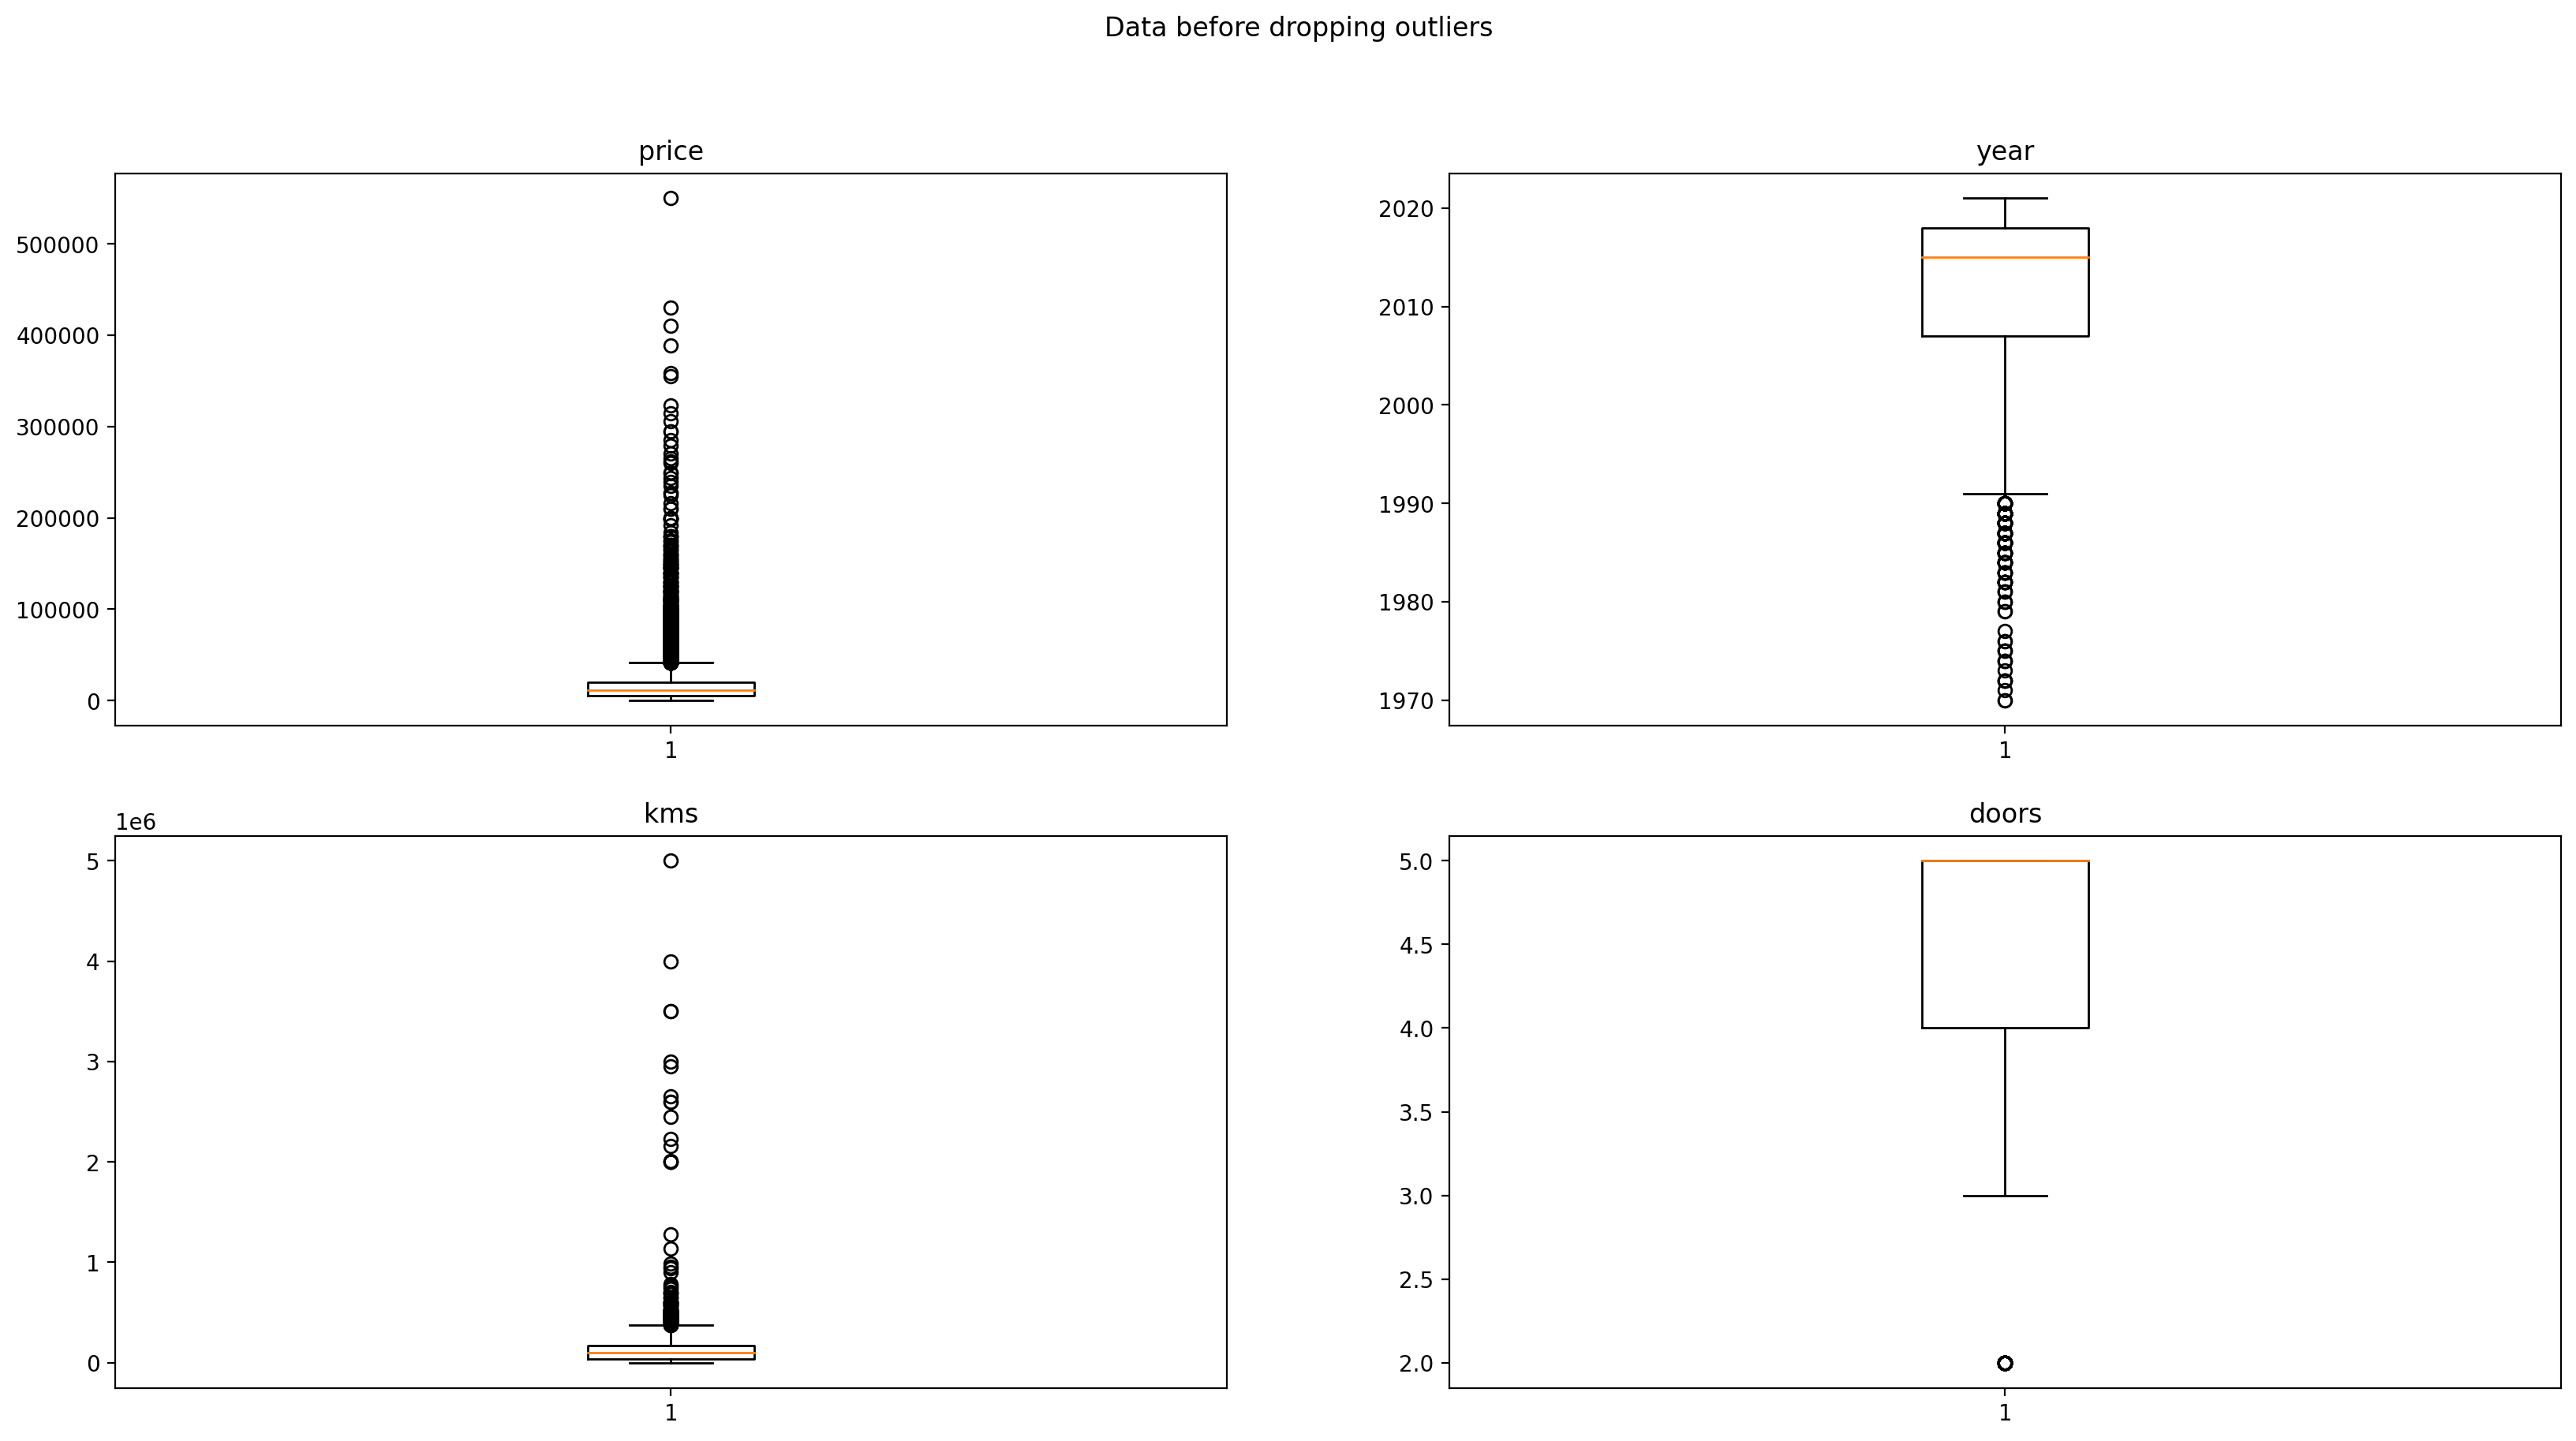

In [8]:
fig, axs = plt.subplots(2, 2)

fig.suptitle('Data before dropping outliers')
fig.set_dpi(200)
fig.set_size_inches(20, 10)
for index, column in enumerate(Y.columns):
    axs[int(index/2)][index%2].boxplot(Y[column])
    axs[int(index/2)][index%2].set_title(column)

## Preprocessing

We can appreciate various outliers in *Price*, *Engine Volume* and a few more. Let's drop them

In [9]:
for column in ['price', 'year', 'kms']:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df_train[column]>=upper)[0]
    lower_array = np.where(df_train[column]<=lower)[0]
    
    # Removing the outliers
    df_train.drop(index=upper_array, inplace=True)
    df_train.drop(index=lower_array, inplace=True)
    df_train.reset_index(inplace=True, drop=True)

Y = df_train.select_dtypes(include = ['float64', 'int64'])

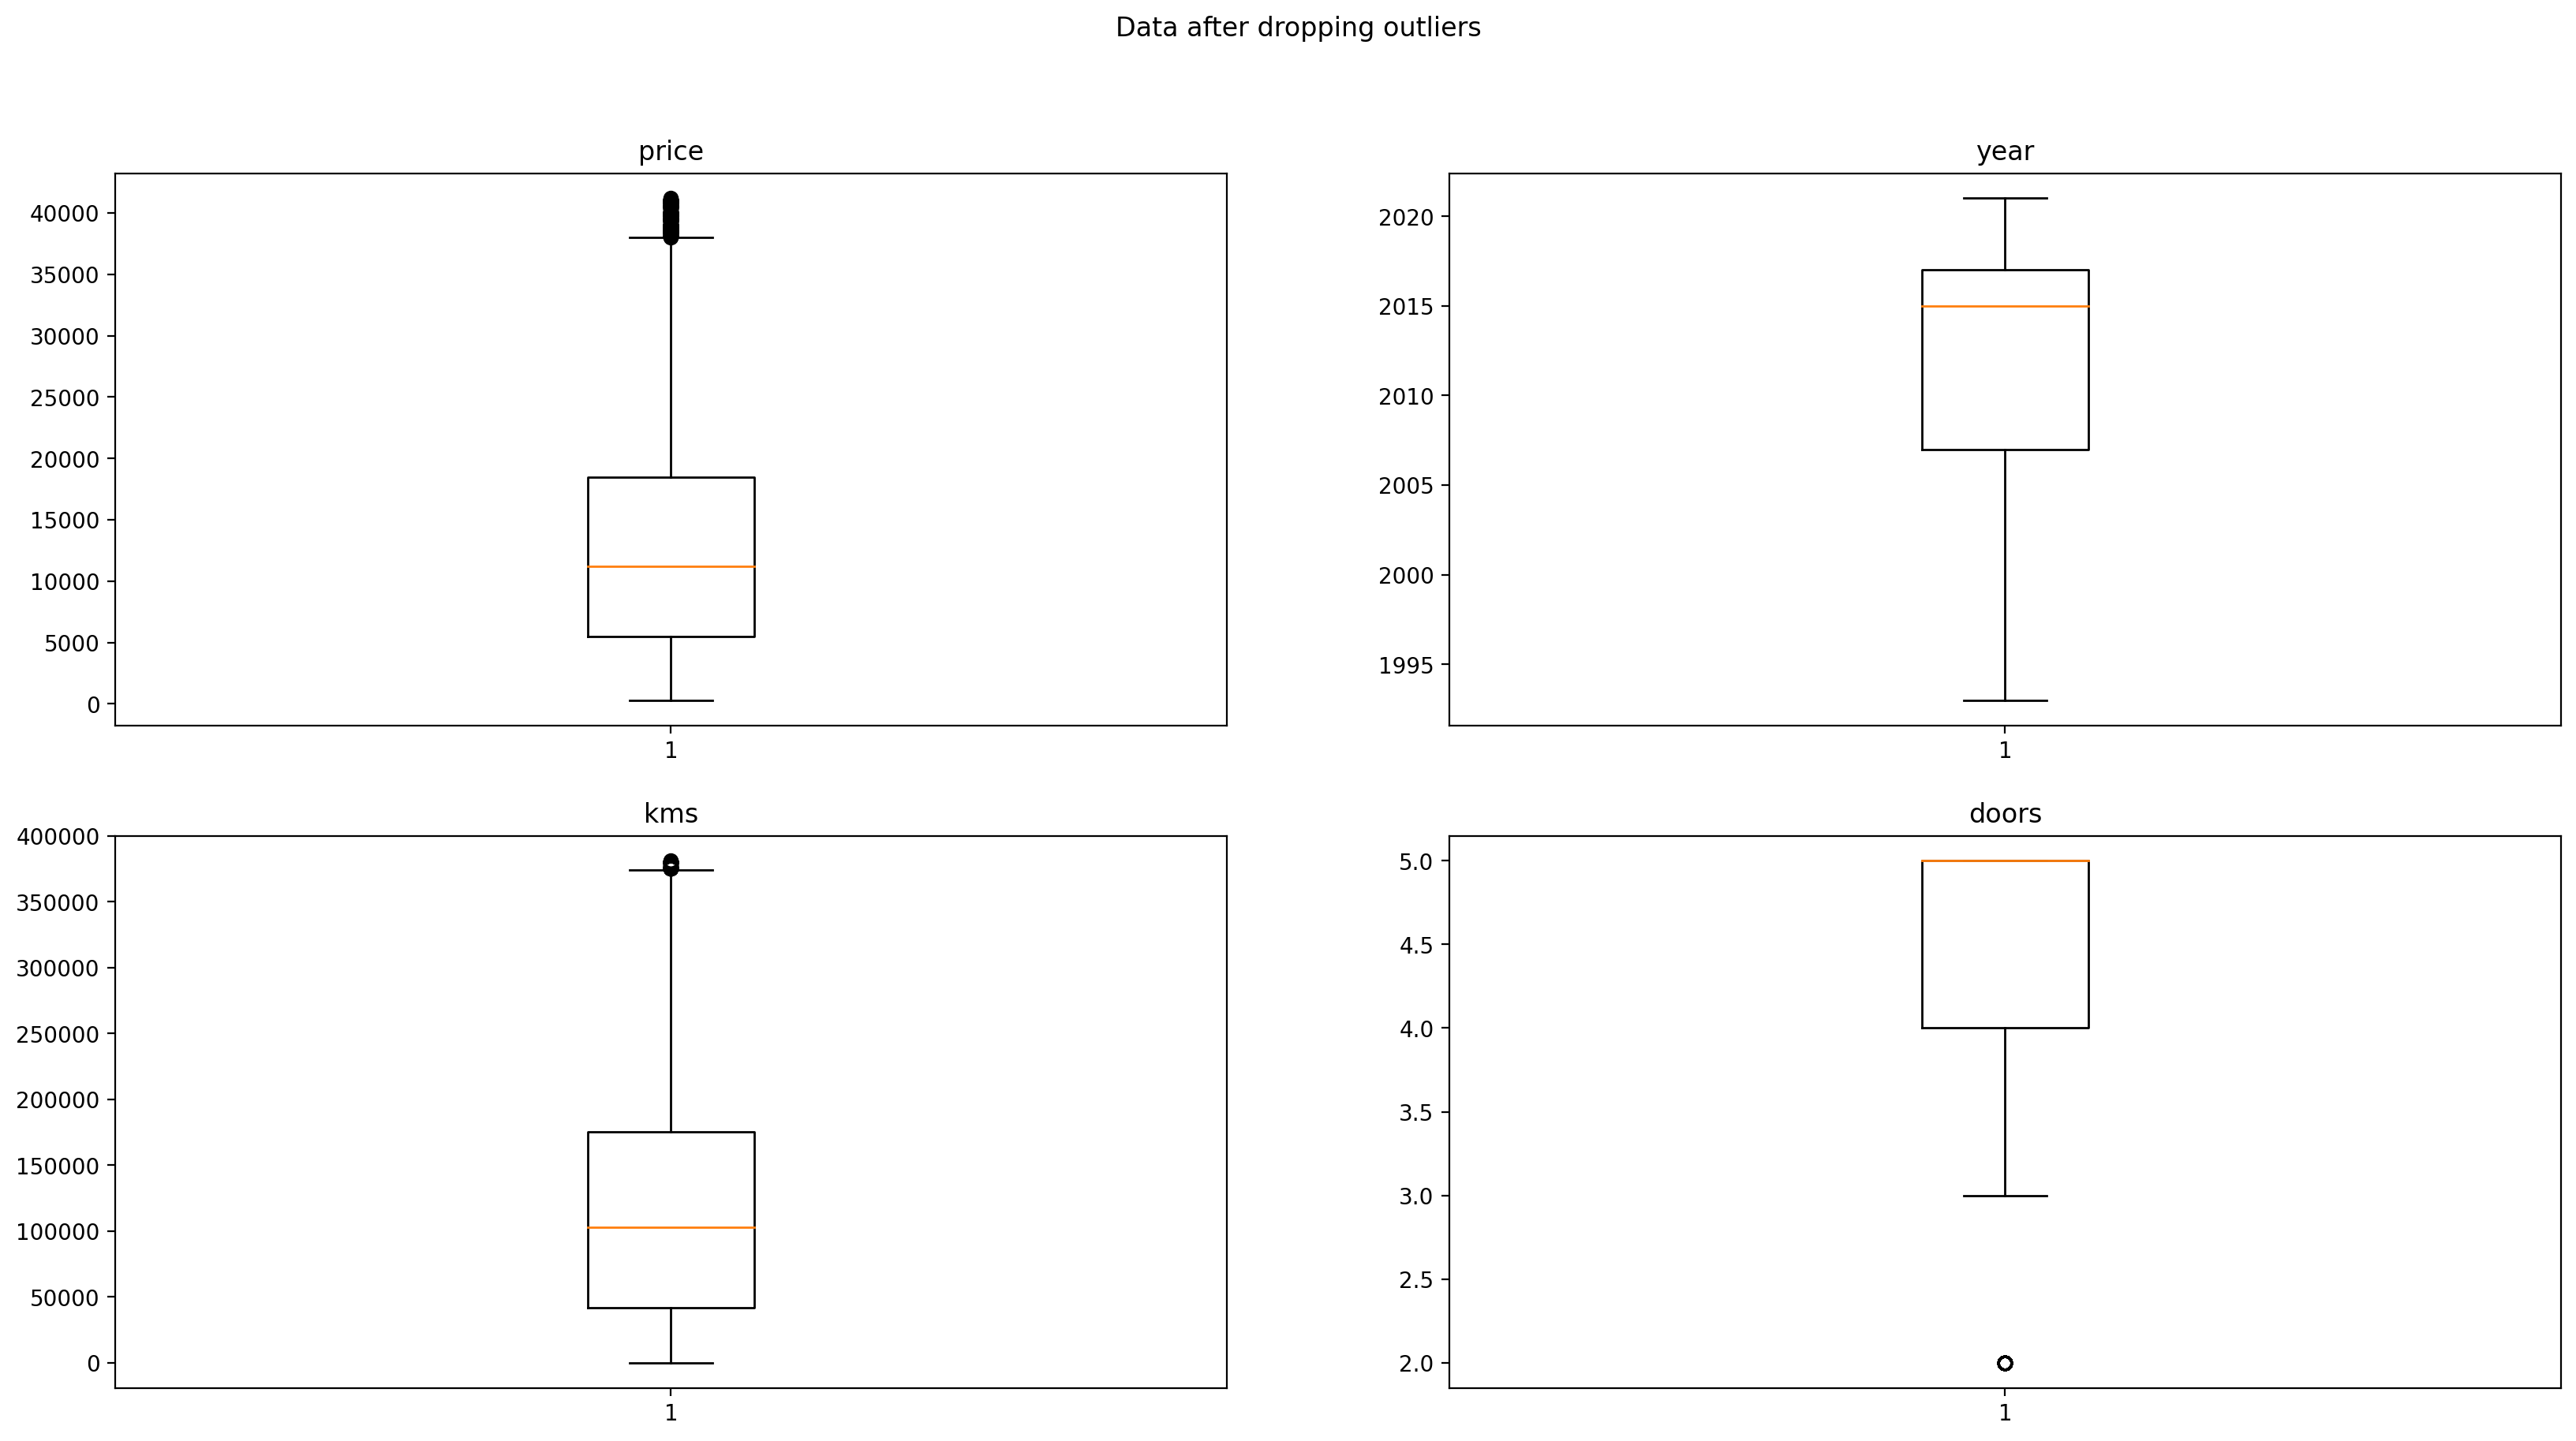

In [10]:
fig, axs = plt.subplots(2, 2)

fig.suptitle('Data after dropping outliers')
fig.set_dpi(200)
fig.set_size_inches(20, 10)

for index, column in enumerate(Y.columns):
    axs[int(index/2)][index%2].boxplot(Y[column])
    axs[int(index/2)][index%2].set_title(column)

This already looks like a much cleaner dataset. We could drop a lot of data that seems to be outlier, but we'll use all the data for the moment and worry later

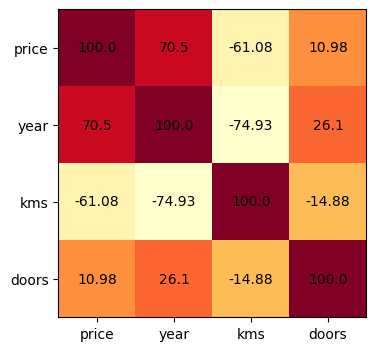

In [11]:
fig, ax = plt.subplots(figsize = (Y.shape[1], Y.shape[1]))
fig = plt.imshow(Y.corr(), cmap = 'YlOrRd')
ax.set_xticks(range(Y.shape[1]))
ax.set_xticklabels(Y.axes[1])
ax.set_yticks(range(Y.shape[1]))
ax.set_yticklabels(Y.axes[1])
for (j,i),label in np.ndenumerate((Y.corr()*100).round(2)):
    ax.text(i,j,label,ha='center',va='center')
plt.show()

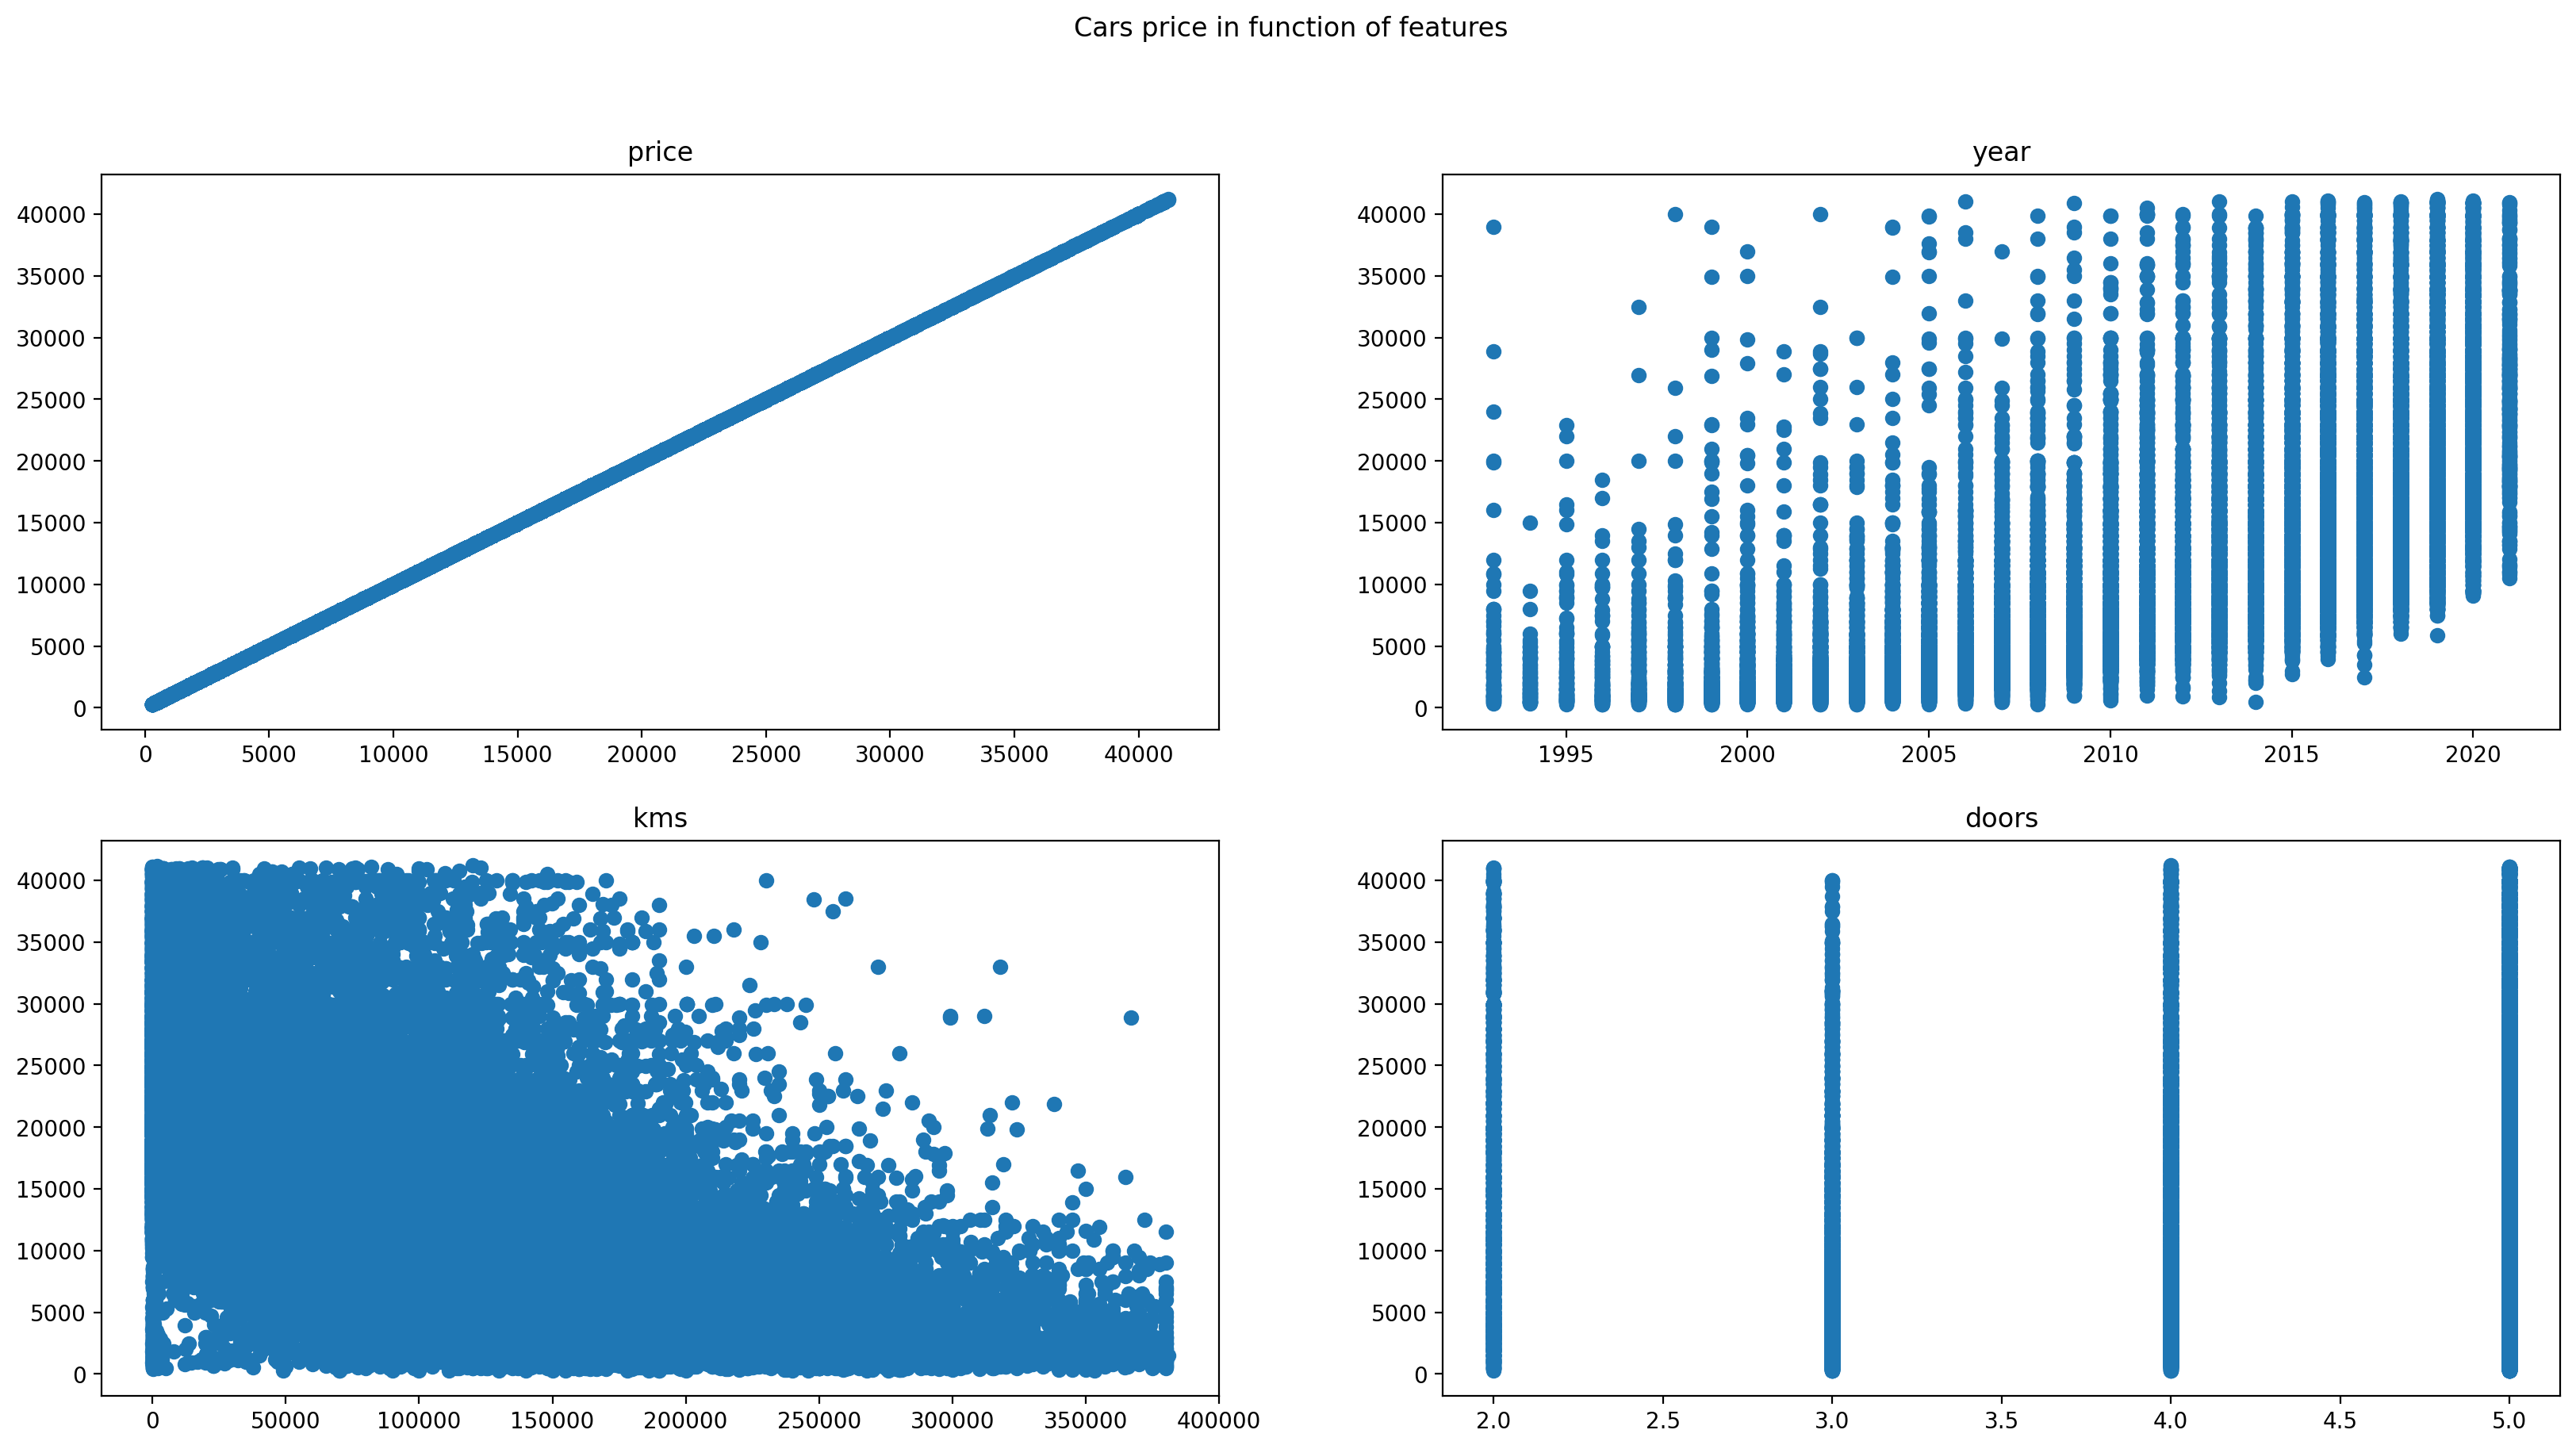

In [12]:
fig, axs = plt.subplots(2, 2)

fig.suptitle('Cars price in function of features')
fig.set_dpi(200)
fig.set_size_inches(20, 10)

for index, column in enumerate(Y.columns):
    axs[int(index/2)][index%2].scatter(Y[column], Y['price'])
    axs[int(index/2)][index%2].set_title(column)

## Get extra features

This project is aimed at predicting car prices based on a few features. We can get extra features that could help us in the prediction. We'll use the jerarquical KMeans algorithm to get the clusters.

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

class GetExtraFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.dataset = None
        self.knownFeatures = []
        self.unknownFeatures = []
        
    def fit(self, X, y=None):
        self.dataset = X
        self.__assignFeatures__(X.columns)
        return self
    
    def __assignFeatures__(self, columns):
        self.knownFeatures = ['manufacturer', 'model', 'color', 'year', 'kms']
        self.unknownFeatures = list((set(columns) - set(self.knownFeatures)) - {'price'})
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        def transformRow(row):
            carmodelInstance = self.dataset[
                (self.dataset['manufacturer']==row['manufacturer']) & 
                (self.dataset['model']==row['model'])].iloc[0, :]
            newRow = pd.Series(index=self.knownFeatures+self.unknownFeatures)
            newRow[self.knownFeatures] = row[self.knownFeatures]
            newRow[self.unknownFeatures] = carmodelInstance[self.unknownFeatures]
            
            return newRow
        
        X = X.apply(transformRow, axis=1)

        return X

In [15]:
getter = GetExtraFeatures()
getter.fit(df_train)


knownFeatures = ['manufacturer', 'model', 'year', 'kms']
X = df_train[knownFeatures]

# getter.transform(X)

## Select and Train a model

We'll construct a mixed model, in the form:
$$
f(\vec x) = c_1 \cdot f_1(\vec w) + (1-c_1) \cdot f_2(\vec x), \;\;\; \text{being} \;\;0 \leq c_1
$$
Where:
- $f_1$ is a linear model depending on mileage and production year.
- $f_2$ is a KNN trained dynamically on the instances of the same model.

In [16]:
df_train.dtypes[(df_train.dtypes!='float64') & (df_train.dtypes!='int64')].index

Index(['manufacturer', 'model', 'version', 'fuel', 'shift', 'is_professional'], dtype='object')

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
categoricalFeatures = list(X_train.dtypes[(X_train.dtypes!='float64') & (X_train.dtypes!='int64')].index)
numericFeatures = X_train.columns.difference(categoricalFeatures)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericFeatures),
        ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist'), categoricalFeatures),
        
    ])

pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('sgd_regressor', SGDRegressor(max_iter=1000))
])

param_grid = {
    'sgd_regressor__loss': ['squared_loss', 'huber'],
    'sgd_regressor__penalty': ['l2', 'elasticnet'],
    'sgd_regressor__alpha': [1e-6, 1e-2, 5e-2],
    'sgd_regressor__epsilon': [1e-2, 0.1, 0.2, 0.3]
}

search = GridSearchCV(pipeline, param_grid, n_jobs=4, cv=5, scoring='neg_mean_squared_error')

In [18]:
search.fit(X_train[['year', 'kms']], y_train)

/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/pyt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sgd_regressor', SGDRegressor())]),
             n_jobs=4,
             param_grid={'sgd_regressor__alpha': [1e-06, 0.01, 0.05],
                         'sgd_regressor__epsilon': [0.01, 0.1, 0.2, 0.3],
                         'sgd_regressor__loss': ['squared_loss', 'huber'],
                         'sgd_regressor__penalty': ['l2', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [19]:
model = search.best_estimator_

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_test = df_test.drop('price', axis=1)
predictedPrice = model.predict(X_test[['year', 'kms']])
print(mean_squared_error(df_test['price'], predictedPrice))
print(mean_absolute_error(df_test['price'], predictedPrice))

613779747.4498982
14351.66113941851


In [21]:
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsRegressor 

def predictPrice_bySimilarity(X, df):
    def getSimilarCarsPrice(x, df):
        similarCars = df[(df['manufacturer']==x['manufacturer']) & (df['model']==x['model'])]
        if similarCars.shape[0] == 0:
            return 13500
        onehot = OneHotEncoder(handle_unknown='ignore')
        similarCars = pd.concat([similarCars.drop(categoricalFeatures, axis=1), pd.DataFrame(onehot.fit_transform(similarCars[categoricalFeatures]).toarray())], axis=1)
        similarCars.columns = similarCars.columns.astype(str)
        similarCars.fillna(0, inplace=True)
        
        X_train = similarCars.drop('price', axis=1)
        pca = PCA(n_components=min(10, similarCars.shape[0]))
        X_train = pca.fit_transform(X_train)
        
        # X_train = similarCars[['Prod. year', 'Mileage']]
        
        knn = KNeighborsRegressor(n_neighbors=min(5, similarCars.shape[0]))
        knn.fit(X_train, similarCars['price'])
        
        # x = pd.DataFrame(x).T[['Prod. year', 'Mileage']]
        x = pd.DataFrame(x).T
        x = pd.concat([x.drop(categoricalFeatures, axis=1), pd.DataFrame(onehot.transform(x[categoricalFeatures]).toarray())], axis=1)
        x.columns = x.columns.astype(str)
        x.fillna(0, inplace=True)
        x = pca.transform(x)
        return knn.predict(x)[0]

    return X.apply(lambda x: getSimilarCarsPrice(x, df), axis=1)

In [22]:
def mixedPredict(X, c1, df):
    return c1*model.predict(X[['year', 'kms']]) + (1-c1)*predictPrice_bySimilarity(X, df)

prediction = mixedPredict(X_test.iloc[:200, :], 0.1, df_train)

In [23]:
mean_squared_error(df_test['price'].iloc[:200], prediction)**(1/2)
mean_absolute_error(df_test['price'].iloc[:200], prediction)

6551.629580661597

### Save model

In [24]:
from joblib import dump

dump(model, 'model.joblib')

['model.joblib']

# License

This Jupyter Notebook and its contents are licensed under the terms of the GNU General Public License Version 2 as published by the Free Software Foundation. The full text of the license can be found at: https://www.gnu.org/licenses/gpl-2.0.html

Copyright (c) 2024, Joaquín Mateos Barroso

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/ for a list of additional licenses.